# <a id="6"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Segmentation Technique (Edge Detection)</h3>

import the needed libraries 

In [7]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage


# **using :**
1.**Sobel Edge Detection**
2.**Laplacian edge detection**
3.**Canny edge detection**
4.**Scharr operator**
5.**Marr-Hildreth edge detector**
6.**Kirsch Operator**

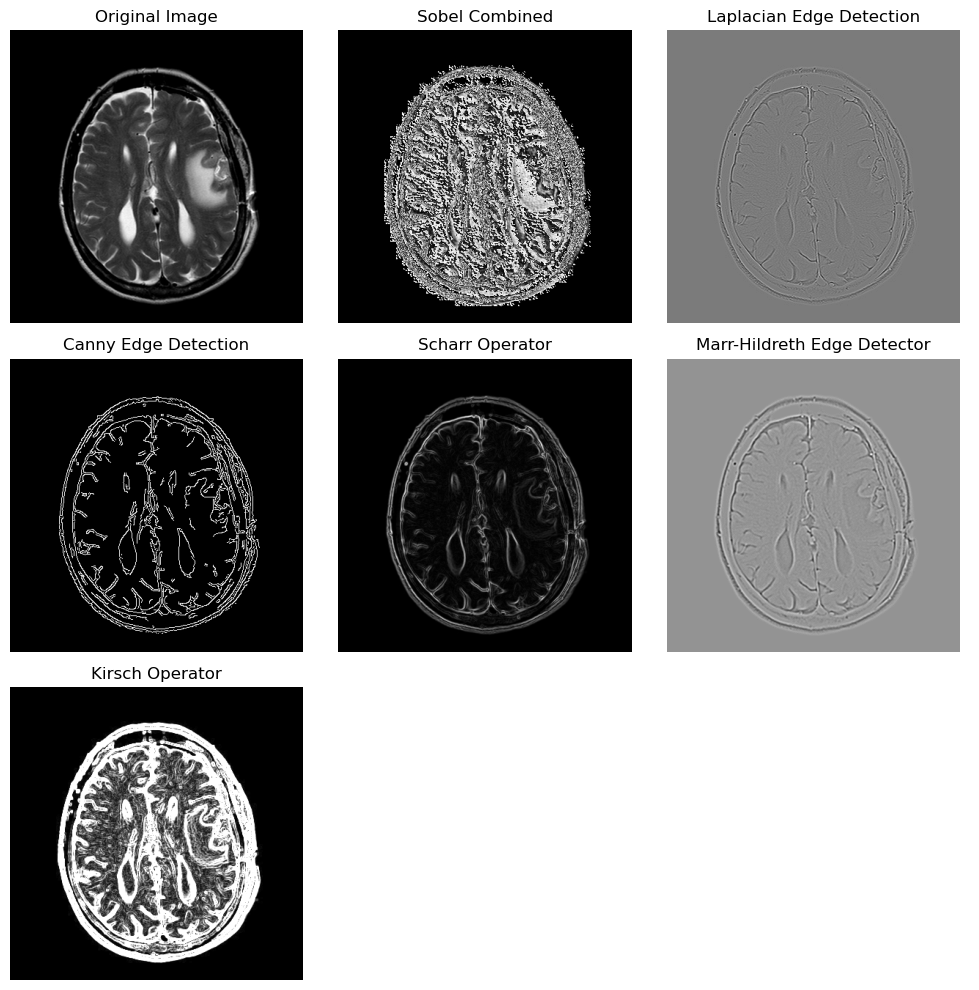

In [6]:
# Read the input image
image = cv2.imread('BRAINIX.jpg', cv2.IMREAD_GRAYSCALE)

# Create a figure and subplots with a fixed size
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Display the original image
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Sobel Edge Detection
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
out_h = ndimage.convolve(image, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(image, sobel_vertical, mode='reflect')
sobel_combined = out_h + out_v

axs[0, 1].imshow(sobel_combined, cmap='gray')
axs[0, 1].set_title('Sobel Combined')
axs[0, 1].axis('off')

# Laplacian Edge Detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

axs[0, 2].imshow(laplacian, cmap='gray')
axs[0, 2].set_title('Laplacian Edge Detection')
axs[0, 2].axis('off')

# Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)

axs[1, 0].imshow(canny_edges, cmap='gray')
axs[1, 0].set_title('Canny Edge Detection')
axs[1, 0].axis('off')

# Scharr Operator
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
scharr_combined = cv2.magnitude(scharr_x, scharr_y)

axs[1, 1].imshow(scharr_combined, cmap='gray')
axs[1, 1].set_title('Scharr Operator')
axs[1, 1].axis('off')

# Marr-Hildreth Edge Detector
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
marr_hildreth = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

axs[1, 2].imshow(marr_hildreth, cmap='gray')
axs[1, 2].set_title('Marr-Hildreth Edge Detector')
axs[1, 2].axis('off')

# Kirsch Operator
kirsch_kernels = [
    np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),
    np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
    np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
    np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
    np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
    np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
    np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
    np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
]
kirsch_responses = [cv2.filter2D(image, -1, kernel) for kernel in kirsch_kernels]
kirsch_combined = np.max(kirsch_responses, axis=0)

axs[2, 0].imshow(kirsch_combined, cmap='gray')
axs[2, 0].set_title('Kirsch Operator')
axs[2, 0].axis('off')

# Hide the empty subplot
axs[2, 1].axis('off')

# Hide the empty subplot
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()


# <a id="6"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Summary of the operators</h3>

Sobel Edge Detection: 
* advantages :
Simple and quick to compute.
Provides separate edge maps for both horizontal and vertical edges.
* disadvantages:
Sensitive to noise, which can lead to false edge detections.

Laplacian Edge Detection:
* Advantages:
Capable of detecting edges at various scales.
* disadvantages:
Sensitive to noise, which can result in false positives.

Canny Edge Detection:
* Advantages:
Highly accurate in detecting edges.
Suppresses noise by using Gaussian smoothing.
* disadvantages:
Computationally more intensive compared to other methods.
May miss some edges, particularly in regions with low contrast or noisy environments.

Scharr Operator:
* Advantages:
More rotationally symmetric than the Sobel operator, providing better edge detection results for diagonal edges.
Requires fewer computations than some other filters like Canny.
* disadvantages:
Similar to Sobel, it is sensitive to noise and may produce false positives.

Marr-Hildreth Edge Detector:
* Advantages:
Provides accurate localization of edges.
* disadvantages:
Sensitive to noise, which can lead to false detections or missed edges.

Kirsch Operator:
* Advantages:
Detects edges in eight different directions, providing a more comprehensive edge map.
* disadvantages:
Computationally expensive compared to some other operators, especially when considering all eight directions.

# <a id="6"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Final words</h3>

Each edge detection filter has its strengths and weaknesses, and the choice of filter depends on factors such as the noise level in the image, the desired accuracy of edge detection.